In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
from collections import Counter
from sklearn import tree
from sklearn.metrics import confusion_matrix 
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dp=pd.read_csv(("/content/lung_cancer_examples.csv"))

In [ ]:
dp.head(20)

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


In [ ]:
dp=dp.drop(['Name', 'Surname'], axis=1)
dp.head(20)

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1
5,34,0,10,0,0
6,58,15,10,0,0
7,22,12,5,2,0
8,45,2,6,0,0
9,52,18,4,5,1


In [ ]:
dp.isnull().sum()

Age       0
Smokes    0
AreaQ     0
Alkhol    0
Result    0
dtype: int64

In [ ]:
A=dp.drop(['Result'], axis=1)
A.head(20)

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6
5,34,0,10,0
6,58,15,10,0
7,22,12,5,2
8,45,2,6,0
9,52,18,4,5


In [ ]:
B=dp['Result']
B.head(20)

0     1
1     1
2     0
3     0
4     1
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    1
14    1
15    0
16    1
17    0
18    1
19    1
Name: Result, dtype: int64

In [ ]:
A_train, A_test, B_train, B_test = train_test_split(A, B,test_size=0.35, random_state=10)

In [ ]:
plot(A_test)

NameError: ignored

In [ ]:
B_test

31    1
3     0
38    0
27    0
21    0
17    0
46    0
2     0
23    0
26    0
35    0
39    0
20    1
37    1
7     0
6     0
45    0
56    1
47    0
10    0
44    0
Name: Result, dtype: int64

In [ ]:
log=LogisticRegression()
log.fit(A_train, B_train)

LogisticRegression()

In [ ]:
log.predict(A_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
log.score(A_train,B_train)

1.0

In [ ]:
log.score(A_test, B_test)

1.0

In [ ]:
B_prod= classifier.predict(A_train)

<Axes: >

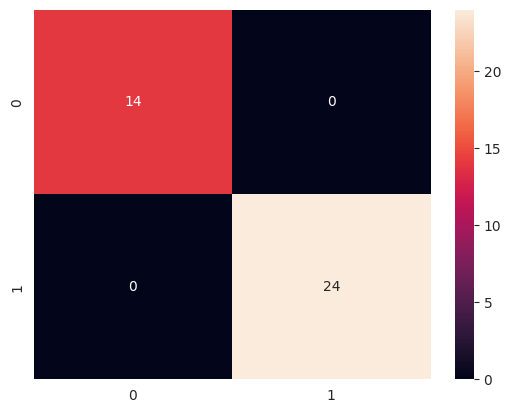

In [ ]:
sb.heatmap(confusion_matrix(B_train, B_prod), annot=True)

In [ ]:
predict=log.predict([[15,20,25,26]])


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [ ]:
predict

array([1])

In [ ]:
fig = go.Figure(data=[go.Pie(labels=list(Counter(dp['Result']).keys()),
                     values=list(Counter(dp['Result']).values()),
                     title='Result Count Distribution',
                     name='')])
fig.update_traces(textfont_size=25)
fig.update_layout(font=dict(size=22))

fig.show()
#0: 'no cancer', 1: 'with cancer'


In [ ]:
labels = dp['Smokes'].value_counts()[:10].index
values = dp['Smokes'].value_counts()[:10].values

colors=dp['Smokes']

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent",
                            insidetextorientation="radial", marker=dict(colors=colors))])

fig.show()

In [ ]:
labels = dp['Alkhol'].value_counts()[:10].index
values = dp['Alkhol'].value_counts()[:10].values

colors=dp['Alkhol']

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent",
                            insidetextorientation="radial", marker=dict(colors=colors))])

fig.show()

In [ ]:
labels = dp['Age'].value_counts()[:10].index
values = dp['Age'].value_counts()[:10].values

colors=dp['Age']

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent",
                            insidetextorientation="radial", marker=dict(colors=colors))])

fig.show()

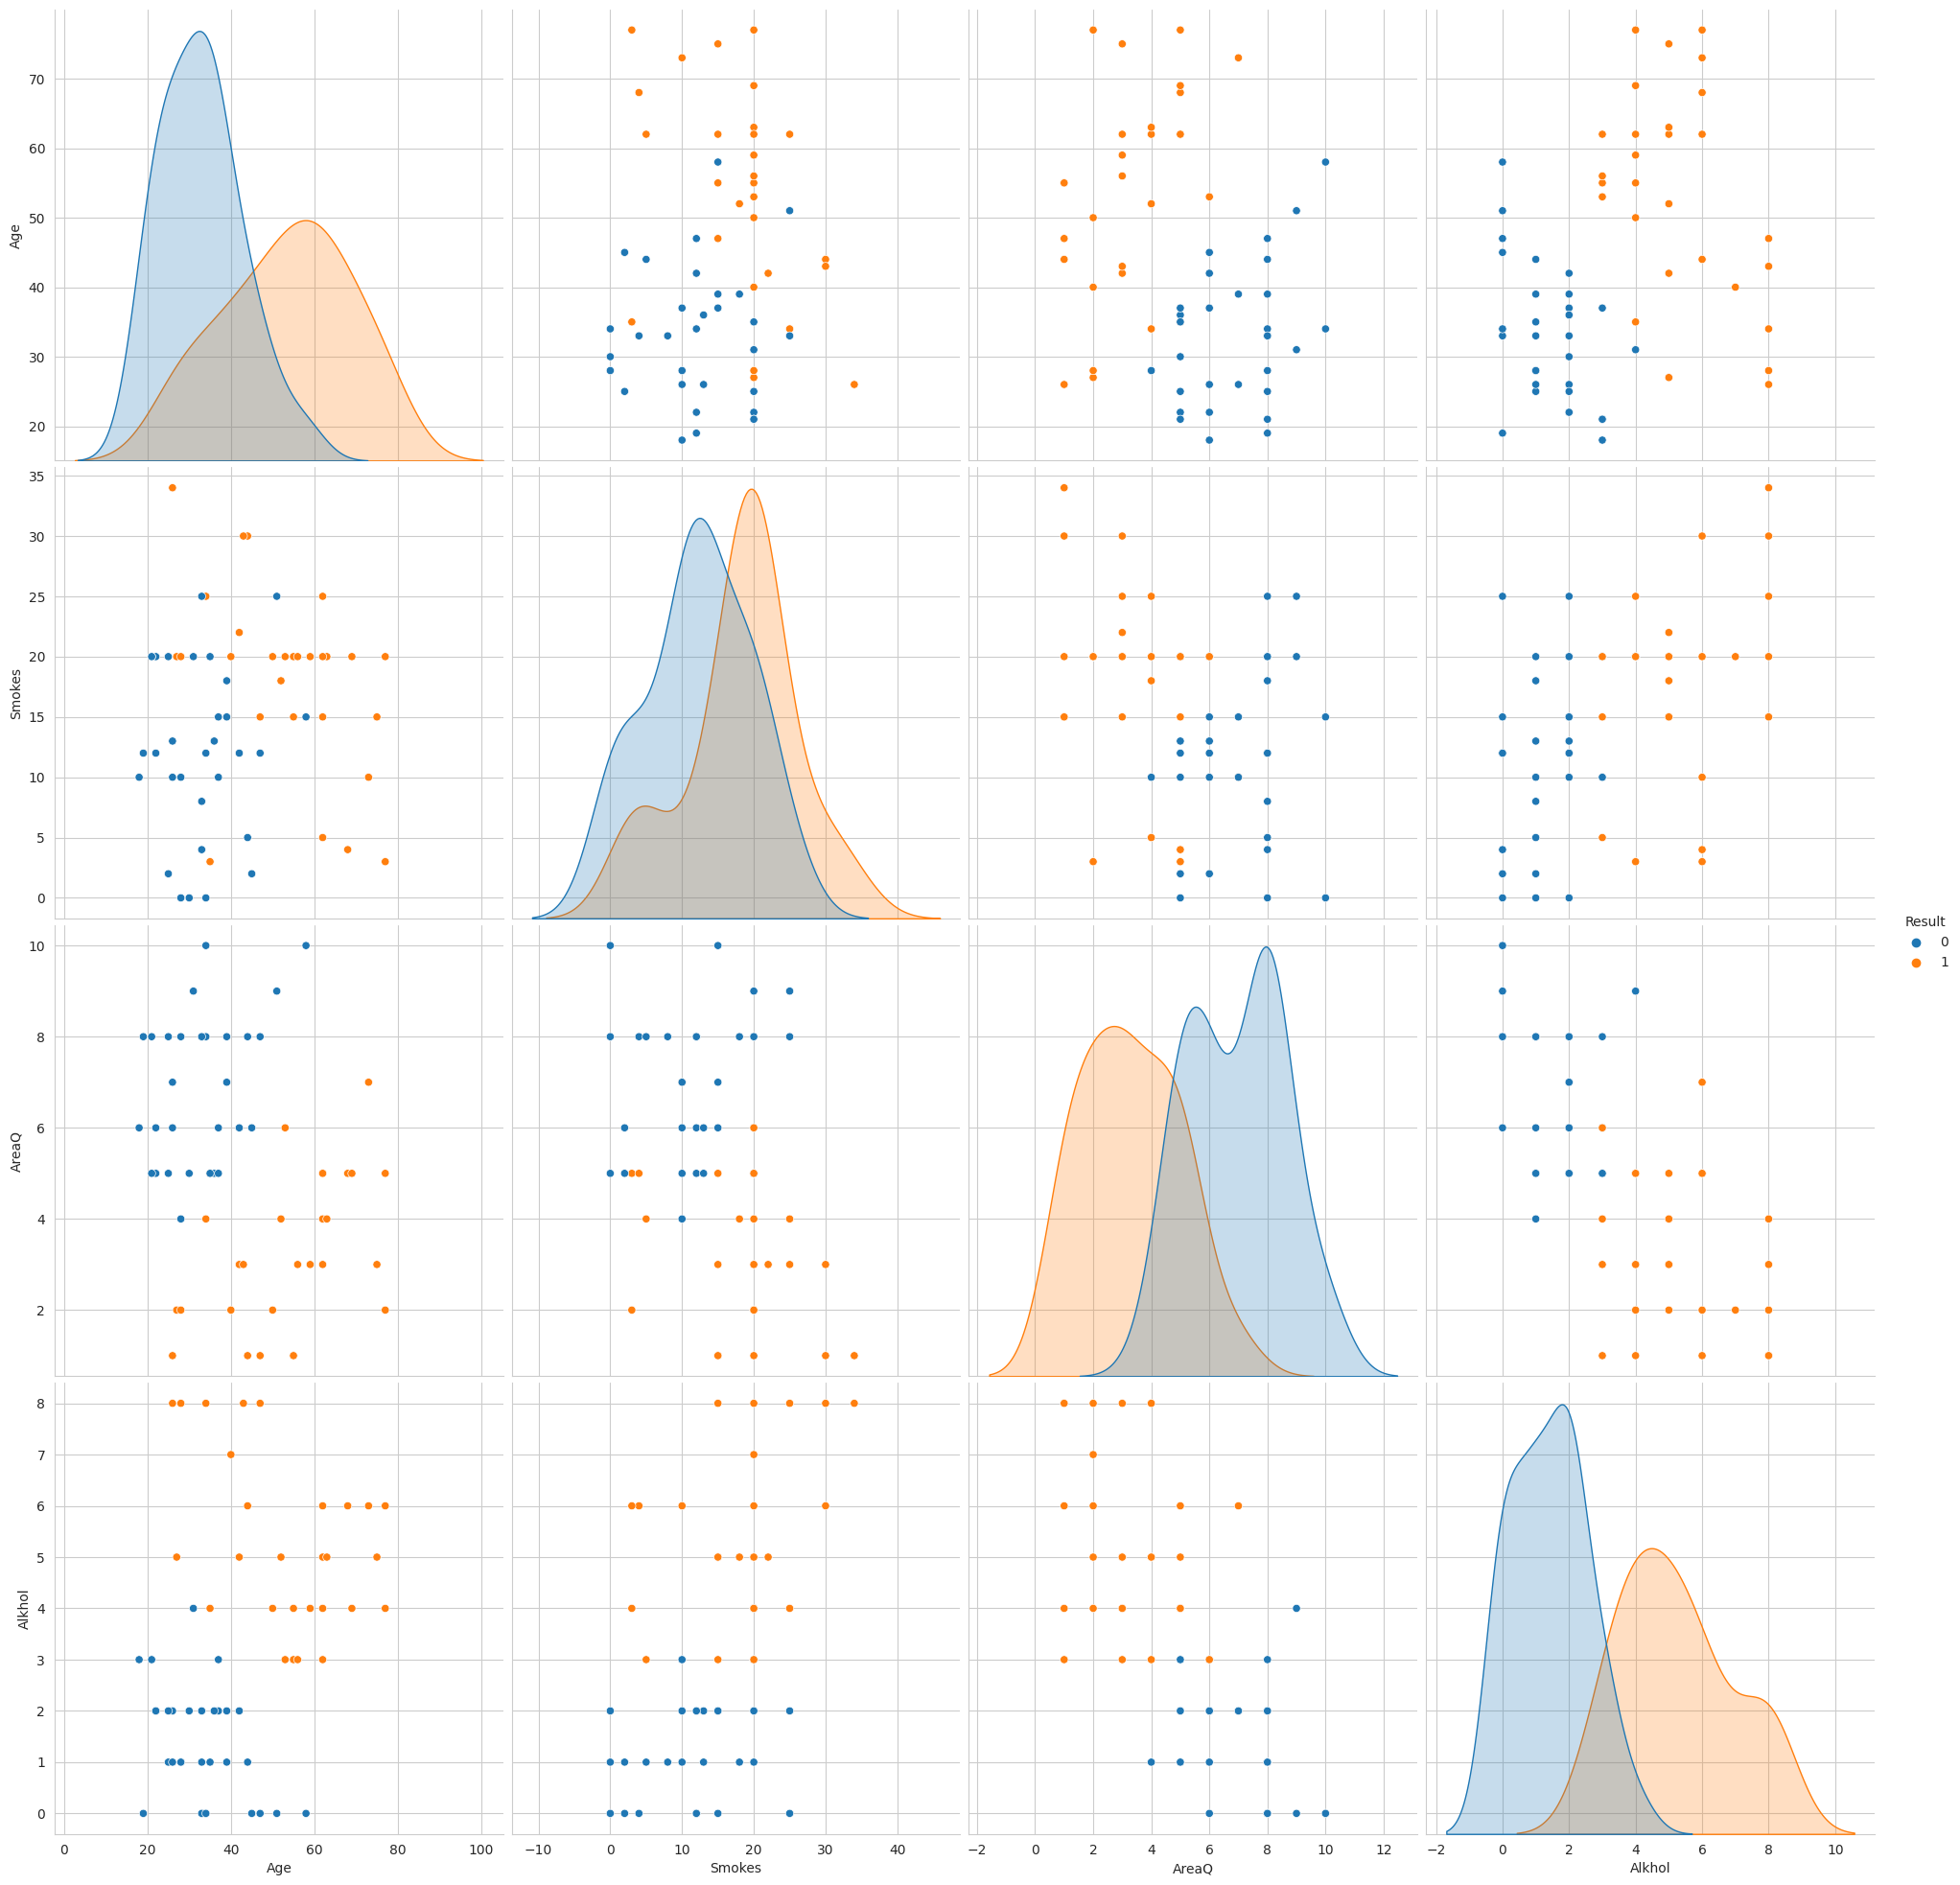

In [ ]:
sb.set_style("whitegrid")
sb.pairplot(dp,hue="Result",height=5);
plt.show()

<ipython-input-17-2bda2be03711>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




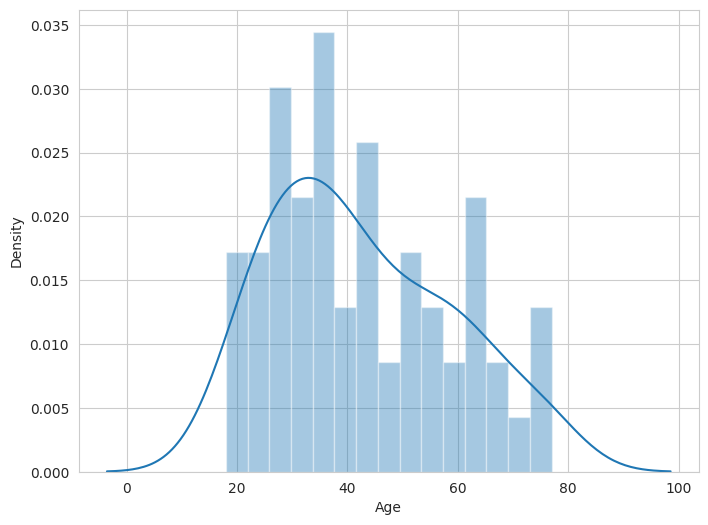

In [ ]:
f, xA = plt.subplots(figsize=(8,6))
A = dp['Age']
xA = sb.distplot(A, bins=15)
plt.show()

<ipython-input-18-4477ee46e33a>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




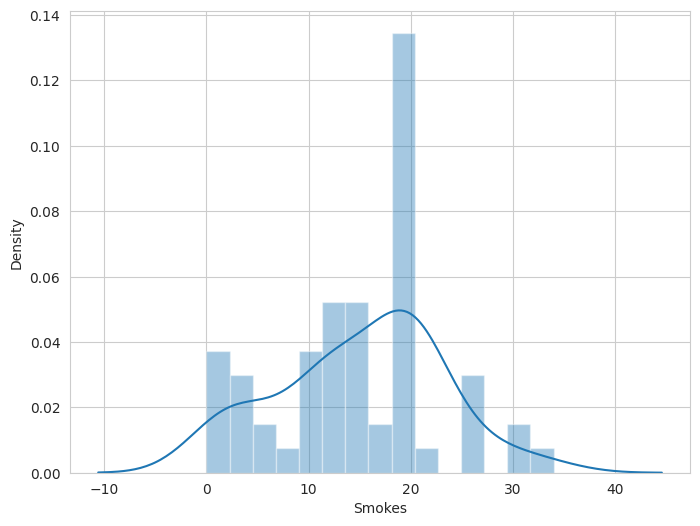

In [ ]:
f, xA = plt.subplots(figsize=(8,6))
A = dp['Smokes']
xA = sb.distplot(A, bins=15)
plt.show()

<ipython-input-19-0a2a28cf90cb>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




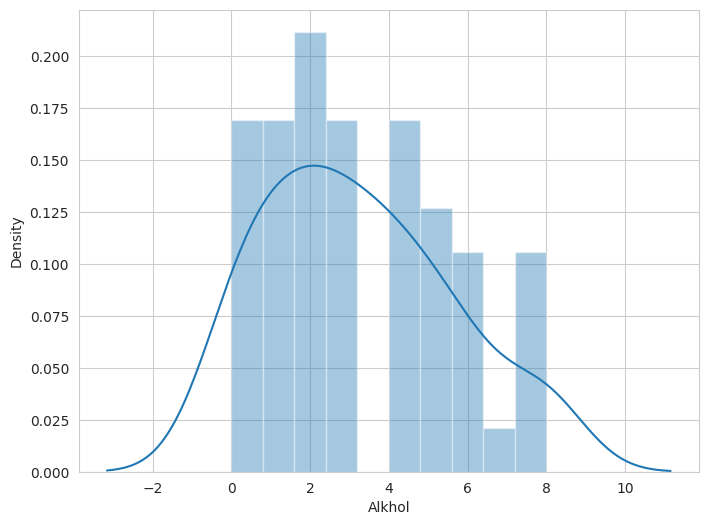

In [ ]:
f, xA = plt.subplots(figsize=(8,6))
A = dp['Alkhol']
xA = sb.distplot(A, bins=10)
plt.show()

[Text(0.6, 0.8333333333333334, 'x[3] <= 3.5\nentropy = 0.949\nsamples = 38\nvalue = [14, 24]'),
 Text(0.4, 0.5, 'x[0] <= 52.0\nentropy = 0.544\nsamples = 16\nvalue = [14, 2]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 22\nvalue = [0, 22]')]

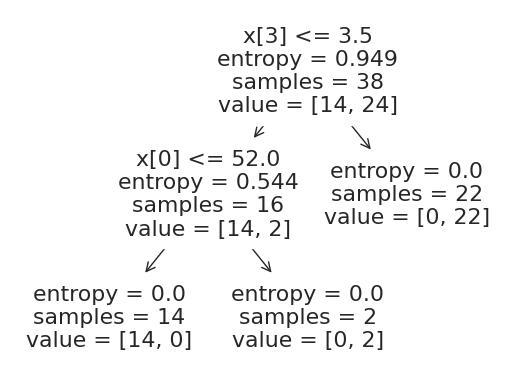

In [ ]:
classifier=DecisionTreeClassifier(criterion='entropy', random_state=0)
z=classifier.fit(A_train, B_train)
tree.plot_tree(z)

In [ ]:
classifier.score(A_train,B_train)



1.0

In [ ]:
classifier.score(A_test,B_test)

0.9047619047619048

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=9)
KNN.fit(A_train,B_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
KNN.score(A_train,B_train)

0.868421052631579

In [ ]:
KNN.score(A_test,B_test)

0.9047619047619048

In [ ]:
B_pred= classifier.predict(A_test) 

<Axes: >

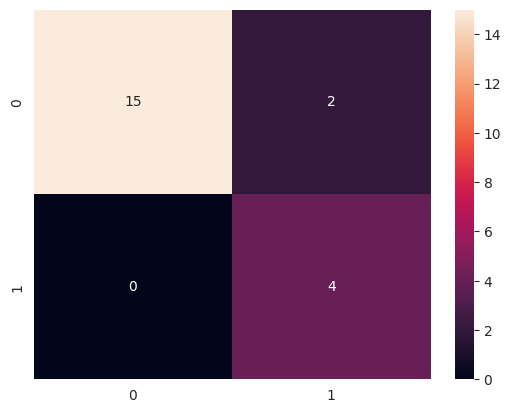

In [ ]:
sb.heatmap(confusion_matrix(B_test, B_pred), annot=True)